<a href="https://colab.research.google.com/github/galungan012-spec/Uas_DataScience_227006516080_FirstlyShuresJeffryson/blob/main/UAS_Data_Science_Firstly_Shures_Jeffryson_227006516080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Persiapan Awal (Google Colab)

In [64]:
# Import library utama
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2. Load Dataset

In [65]:
# Load dataset
df = pd.read_csv("Campus Recruitment.csv")

# Tampilkan 5 data awal
df.head()


,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


3. Menelaah Data

In [66]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    float64
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    float64
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    float64
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    float64
 11  Pendidikan pascasarjana           215 non-null    object 
 12  Nilai ra

In [67]:
# Statistik deskriptif
df.describe()

,ID,Nilai rata-rata SMP,Nilai rata-rata SMA,IPK,Nilai tes kemampuan kerja,Nilai rata-rata pascasarjana,Gaji
count,215.000000,213.000000,214.000000,215.000000,209.000000,215.000000,1.480000e+02
mean,108.000000,67.273380,66.330047,66.370186,72.114115,62.278186,5.773108e+06
std,62.209324,10.842297,10.922964,7.358743,13.351612,5.833385,1.869149e+06
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,4.000000e+06
25%,54.500000,60.400000,60.850000,61.000000,60.000000,57.945000,4.800000e+06
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,5.300000e+06
75%,161.500000,75.400000,73.000000,72.000000,84.000000,66.255000,6.000000e+06
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,1.880000e+07


In [68]:
# Cek missing value
df.isnull().sum()

,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


4. Validasi & Pembersihan Data

In [69]:
# Menghapus kolom ID
df = df.drop(columns=['ID'])

In [70]:
# Mengubah target variable ke bentuk numerik
df['status kelulusan (Bekerja/Belum)'] = df['status kelulusan (Bekerja/Belum)'].map({
    'Placed': 1,
    'Not Placed': 0
})

5. Menentukan Objek Data

In [71]:
# Fitur dan target
X = df.drop(columns=['status kelulusan (Bekerja/Belum)', 'Gaji'])
y = df['status kelulusan (Bekerja/Belum)']

6. Konstruksi Data

In [72]:
# Identifikasi tipe kolom
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [73]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', LabelEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [74]:
# Encoding manual
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [75]:
# Scaling numerik
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


7. Pembagian Data Training & Testing

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


8. Membangun Model & Evaluasi

In [77]:
# Logistic Regression

from sklearn.impute import SimpleImputer

# Identify numerical columns that require imputation
cols_to_impute_num = ['Nilai rata-rata SMP', 'Nilai rata-rata SMA', 'Nilai tes kemampuan kerja']

# Create an imputer for numerical features using the mean strategy
imputer_num = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_train
X_train[cols_to_impute_num] = imputer_num.fit_transform(X_train[cols_to_impute_num])

# Transform X_test using the imputer fitted on X_train
X_test[cols_to_impute_num] = imputer_num.transform(X_test[cols_to_impute_num])

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8837209302325582
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



In [78]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.77      0.90      0.83        30

    accuracy                           0.74        43
   macro avg       0.70      0.64      0.65        43
weighted avg       0.73      0.74      0.72        43



In [79]:
# Random Forest

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.88      0.93      0.90        30

    accuracy                           0.86        43
   macro avg       0.85      0.81      0.83        43
weighted avg       0.86      0.86      0.86        43



9. Confusion Matrix (Visualisasi)

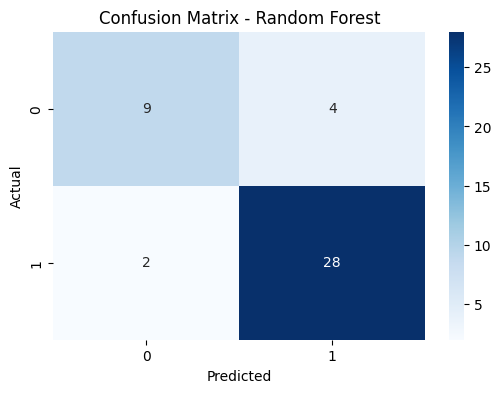

In [80]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


10. Interpretasi Feature Importance

In [81]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
1,Nilai rata-rata SMP,0.305526
6,IPK,0.189265
3,Nilai rata-rata SMA,0.139377
11,Nilai rata-rata pascasarjana,0.113302
9,Nilai tes kemampuan kerja,0.060348
4,Lembaga pendidikan kelas 12,0.045114
8,Pengalaman kerja sebelum lulus,0.036191
2,Lembaga pendidikan kelas 10,0.027364
10,Pendidikan pascasarjana,0.027141
0,Jenis Kelamin,0.025525


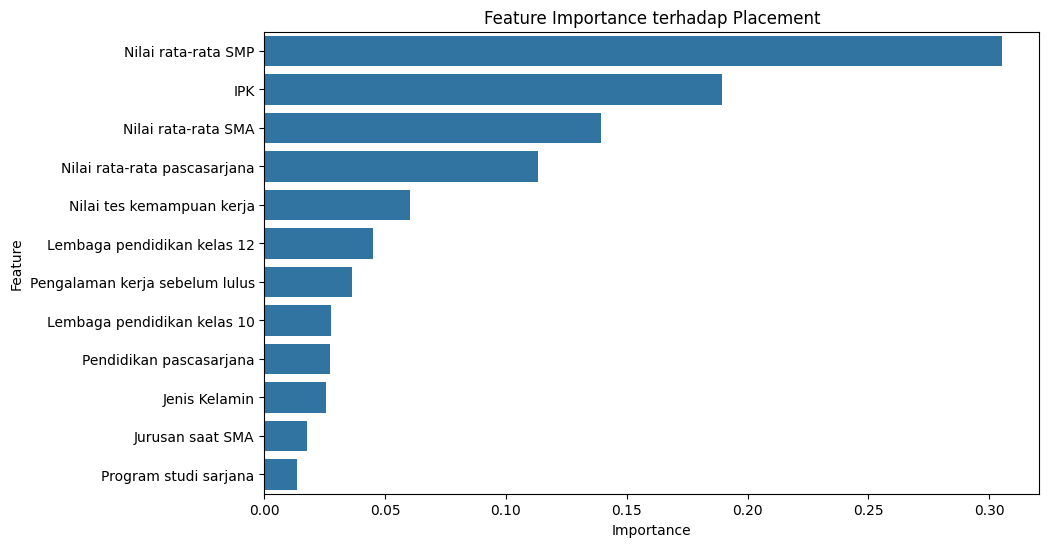

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance
)
plt.title("Feature Importance terhadap Placement")
plt.show()


In [83]:
print("""
Kesimpulan Model:
- Random Forest memberikan performa terbaik
- Faktor akademik (IPK, nilai SMA, nilai PG) berpengaruh signifikan
- Faktor employability (tes kemampuan kerja & pengalaman kerja) sangat dominan
""")



Kesimpulan Model:
- Random Forest memberikan performa terbaik
- Faktor akademik (IPK, nilai SMA, nilai PG) berpengaruh signifikan
- Faktor employability (tes kemampuan kerja & pengalaman kerja) sangat dominan

